In [ ]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import path
from scipy.spatial.distance import pdist,squareform

In [ ]:
#Definition von Konstanten für die Anzeige der Stadtindizess
xshift=0.2
yshift=0.2

#Anzahl der Städte
cities = 20

In [ ]:
#X- und Y- Koordinaten des Polygons, innerhalb dessen die Städte liegen
x=np.array([2, 10, 14, 11, 15, 14, 10, 7, 5, 2, 1, 3, 2])
y=np.array([2, 0, 2, 5, 9, 19, 16, 19, 16, 12, 6, 5, 2])
Verts=np.array([x,y]).transpose()
p = path.Path(Verts)

In [ ]:
#Erzeugen der Städte und der Plot der Städte in der grafischen Oberfläche
plt.figure(1)
plt.subplot(121)
plt.plot(x,y)
plt.grid(True)
#plt.hold(True)
i=0
np.random.seed(seed=346466)
locations=np.zeros((cities,2)) #Zufällige Festlegung der Orte
while i in range(cities):
        xp=np.random.randint(0,max(x))
        yp=np.random.randint(0,max(y))
        isin=p.contains_point((xp,yp)) #testet ob der Punkt innerhalb des Polygons liegt
        #print(xp, yp, isin)
        if isin:
                locations[i,:]=[xp,yp]
                plt.plot([xp],[yp],'ro')
                plt.text(xp+xshift,yp+yshift,str(i))
                i+=1
#print(locations)

In [ ]:
#Berechnung der euklidischen Distanz zwischen allen möglichen Stadtpaaren
distances = squareform(pdist(locations,'euclidean'))
#print(distances)

np.random.seed()

# Genetischer Algorithmus zur Lösung des TSP 

In [ ]:
#Definition der Konstanten für den GA
ITERATIONS=30;
POPSIZE=16;
CROSSPROP=0.99;
MUTPROP=0.05;

bestDist=np.zeros(ITERATIONS) #In diesem Array wird für jede Iteration die beste Distanz gespeichert

In [ ]:
#Erzeugen einer zufälligen Startpopulation
population=np.zeros((POPSIZE,cities+1))
for j in range(POPSIZE):
    population[j,0:cities]=np.random.permutation(cities)
    population[j,cities]=population[j,0]
#print(population)

In [ ]:
cost=np.zeros(POPSIZE)#Speichert die Kosten jedes Chromosoms der aktuellen Population
#Berechnung der Kosten jedes Chromosoms

In [ ]:
##################################################################################################
for it in range(ITERATIONS):
    
    #1.Berechne Fitness der aktuellen Chromosomen#################################################
    for j,pop in enumerate(population):
        cost[j]=0
        for z in range(cities):
            print(j,z,cost[j],pop[z],pop[z+1])
            cost[j]=cost[j]+distances[int(pop[z]),int(pop[z+1])]

    sortedIndex=cost.argsort(axis=0)#Indizees der nach ansteigenden Kosten sortierten Chromosomen
    sortedCost=cost[sortedIndex] #die ansteigend sortierten Kosten
    bestDist[it]=sortedCost[0]
    sortedPopulation=population[sortedIndex] #Sortierung der Population nach ansteigenden Kosten
    InvertedCost=1/sortedCost #Berechung des Nutzen (Fitness) aus den Kosten
    #InvertedCost enthält die berechneten Fitness-Werte

    if it%100==0:
        print('-'*10+' Iteration: ',it)
        print(InvertedCost[0])
        print(sortedPopulation[0])

    #2.Selektion: Zufällige Auswahl von Chromosomen aus der Population####################
    #Mit dem folgenden Prozess wird gewährleistet, dass die Wahrscheinlichkeit für die
    #Selektion eines Chromosoms umso größer ist, je größer sein Nutzenwert ist.
    InvertedCostSum = InvertedCost.sum()
    rn1=InvertedCostSum*np.random.rand()
    found1 = False
    index=1
    while not found1:
        if rn1<InvertedCost[:index].sum(axis=0):
            found1=index
        else:
            index+=1
        
    found1=found1-1
    equal=True
    while equal:
        rn2=InvertedCostSum*np.random.rand()
        found2 = False
        index=1
        while not found2:
            if rn2<InvertedCost[:index].sum(axis=0):
                found2=index
            else:
                index+=1
        found2=found2-1
        if found2 != found1:
            equal=False
            
    parent1=sortedPopulation[found1]
    parent2=sortedPopulation[found2]
    ########## parent1 und parent2 sind die selektierten Chromsomen##############################

    
    
    #3.Kreuzung####################################################################################
    crossrn=np.random.rand()
    if crossrn<CROSSPROP:
        cp=np.ceil(np.random.rand()*cities)
        head1=parent1[:int(cp)]
        
        tailind=0
        tail1=np.zeros(cities-int(cp)+1)
        for a in range(cities):
            if parent2[a] not in head1:
                tail1[tailind]=parent2[a]
                tailind+=1
        tail1[-1]=head1[0]
        head2=parent2[:int(cp)]
        tailind=0
        tail2=np.zeros(cities-int(cp)+1)
        for a in range(cities):
            if parent1[a] not in head2:
                tail2[tailind]=parent1[a]
                tailind+=1
        tail2[-1]=head2[0]
        child1=np.append(head1,tail1)
        child2=np.append(head2,tail2)
    #child1 und child2 sind die Ergebnisse der Kreuzung###############################################


    #4. Mutation#########################################################################################
    mutrn=np.random.rand()
    if mutrn<MUTPROP:
        mutInd=np.ceil(np.random.rand(2)*(cities-1))
        first=child1[int(mutInd[0])]
        second=child1[int(mutInd[1])]
        child1[int(mutInd[0])]=second
        child1[int(mutInd[1])]=first
        child1[-1]=child1[0]

    mutrn=np.random.rand()
    if mutrn<MUTPROP:
        mutInd=np.ceil(np.random.rand(2)*(cities-1))
        first=child2[int(mutInd[0])]
        second=child2[int(mutInd[1])]
        child2[int(mutInd[0])]=second
        child2[int(mutInd[1])]=first
        child2[-1]=child2[0]
    #child1 und child2 sind die Resultate der Mutation################################################



    #5. Ersetze die bisher schlechtesten Chromosomen durch die neu gebildeten Chromosomen, falls die neuen
    #besser sind
    costChild1=0
    costChild2=0
    for z in range(cities):
        costChild1=costChild1+distances[int(child1[z]),int(child1[z+1])]
        costChild2=costChild2+distances[int(child2[z]),int(child2[z+1])]
    replace1=False
    replace2=False
    index=POPSIZE-1
    while index > 0:
        if sortedCost[index]>costChild1 and not replace1:
            if not np.ndarray.any(np.ndarray.all(child1==sortedPopulation,axis=1)):
                sortedPopulation[index]=child1
            replace1=True
        elif sortedCost[index]>costChild2 and not replace2:
            if not np.ndarray.any(np.ndarray.all(child2==sortedPopulation,axis=1)):
                sortedPopulation[index]=child2
            replace2=True
        if replace1 and replace2:
            break
        index=index-1
    population=sortedPopulation
    ######################################Ende der Iteration#############################


Best distance  100.69787821181666
Population  [16.  6. 15.  0. 17. 13.  1.  3. 19. 14.  4. 10.  8.  5.  7. 18. 11.  2.
  9. 12. 16.]


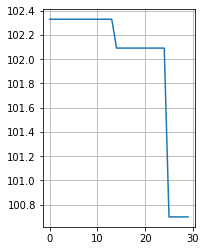

In [13]:
#Graphische Anzeige der Kosten über die Iterationen und graphische Anzeige des gefundenen Weges
xcoords=[]
ycoords=[]
for i in range(cities+1):
        xcoords.append(locations[int(sortedPopulation[0,i]),0])
        ycoords.append(locations[int(sortedPopulation[0,i]),1])

plt.plot(xcoords,ycoords,'r-')
print("Best distance ",bestDist[-1])
print("Population ",population[0])
plt.subplot(122)
plt.grid(True)
plt.plot(range(ITERATIONS),bestDist)
plt.show()